In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

#Data Explortary

In [ ]:
#Load the raw data
Data_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Msc_thesis/Data_2020_T30.csv')

#Choose the option with delat equals to 50, which means at-the-money
Data_2020_Del_50 = Data_2020[Data_2020['delta'] == 50]

# clean the ticker which lack of some data
sp500_2020 = pd.DataFrame(Data_2020_Del_50.groupby(['ticker', 'date']).impl_volatility.mean().unstack(level=0)).dropna(axis = 1)
sp500_2020

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019/12/31,0.231957,0.355781,0.317965,0.275683,0.225695,0.285365,0.587982,0.191003,0.143025,0.193988,0.227788,0.188053,0.194053,0.235131,0.174177,0.125581,0.173483,0.154833,0.183952,0.193945,0.143135,0.220802,0.340822,0.423652,0.242878,0.161691,0.196011,0.262068,0.241100,0.501863,0.190463,0.203581,0.224916,0.180696,0.258466,0.262415,0.215861,0.237847,0.169038,0.243990,...,0.164242,0.183319,0.266465,0.260547,0.244891,0.238872,0.140033,0.177889,0.217480,0.281884,0.188768,0.141923,0.271328,0.270629,0.283545,0.432367,0.143757,0.182394,0.187838,0.295438,0.208299,0.158991,0.218377,0.133958,0.172903,0.265377,0.255894,0.213620,0.187672,0.359346,0.144847,0.355284,0.186334,0.214983,0.236810,0.194631,0.208844,0.343469,0.213197,0.176373
2020/01/02,0.243381,0.352193,0.334682,0.297103,0.224914,0.296530,0.569672,0.194774,0.145651,0.194477,0.223375,0.189959,0.193649,0.243872,0.165411,0.134136,0.174956,0.145966,0.202764,0.196813,0.152839,0.259519,0.332318,0.430876,0.234112,0.161227,0.197632,0.272741,0.241957,0.520409,0.191160,0.219524,0.222787,0.185183,0.269195,0.293621,0.217643,0.242205,0.171814,0.232134,...,0.157158,0.171162,0.257917,0.342303,0.246540,0.255362,0.151712,0.187930,0.215434,0.285224,0.203226,0.147029,0.252013,0.274981,0.276620,0.462141,0.158325,0.198863,0.183423,0.297403,0.177023,0.157066,0.286978,0.142330,0.167561,0.261648,0.264216,0.223794,0.195986,0.335844,0.162161,0.360360,0.188988,0.208278,0.233245,0.210286,0.211998,0.339634,0.212311,0.194027
2020/01/03,0.260982,0.392161,0.346894,0.299994,0.240116,0.309494,0.581088,0.215817,0.153272,0.202396,0.239215,0.200626,0.210320,0.248721,0.163312,0.140551,0.180158,0.153055,0.202312,0.201591,0.159691,0.226766,0.344298,0.447426,0.242791,0.168828,0.202024,0.289345,0.570757,0.556203,0.201926,0.224748,0.240518,0.191883,0.273094,0.295057,0.219931,0.251462,0.189530,0.260985,...,0.174467,0.190219,0.270800,0.332177,0.280626,0.266370,0.151422,0.183008,0.221095,0.286372,0.205205,0.164604,0.268000,0.287629,0.277579,0.466202,0.155008,0.186526,0.189290,0.311524,0.185525,0.165410,0.249613,0.153489,0.135318,0.274615,0.275708,0.232118,0.213195,0.352095,0.146081,0.376884,0.198641,0.205646,0.241200,0.217307,0.228874,0.334663,0.224165,0.201429
2020/01/06,0.246292,0.397262,0.355717,0.296397,0.256391,0.318513,0.602823,0.198301,0.144422,0.202842,0.242214,0.205512,0.208135,0.245353,0.162427,0.133460,0.174248,0.156260,0.195885,0.199816,0.154366,0.292278,0.350792,0.451618,0.243446,0.164950,0.210589,0.301885,0.430295,0.584503,0.204535,0.208872,0.238847,0.191556,0.285072,0.331657,0.217707,0.243686,0.176347,0.235620,...,0.179002,0.184038,0.278631,0.267646,0.269937,0.270984,0.148050,0.180911,0.225514,0.301105,0.208634,0.164537,0.270957,0.286671,0.282335,0.459720,0.157646,0.197721,0.189626,0.321304,0.179220,0.162898,0.215753,0.144770,0.170127,0.263925,0.271253,0.223819,0.219295,0.355606,0.154694,0.378725,0.189465,0.211106,0.245762,0.233335,0.224788,0.350178,0.221160,0.204886
2020/01/07,0.255206,0.384761,0.348130,0.293099,0.247658,0.338893,0.621956,0.206236,0.164973,0.204270,0.248564,0.217587,0.219109,0.249409,0.158807,0.135305,0.181258,0.165837,0.207441,0.212109,0.162690,0.267671,0.348439,0.462707,0.254555,0.176256,0.214170,0.307291,0.304798,0.568811,0.207560,0.211373,0.251244,0.197932,0.284117,0.348025,0.215988,0.250501,0.185923,0.262858,...,0.184996,0.186516,0.273895,0.314679,0.257628,0.280568,0.158007,0.154893,0.229520,0.312763,0.211317,0.172051,0.266627,0.280672,0.296073,0.480394,0.152669,0.187313,0.194957,0.320593,0.190800,0.168063,0.206548,0.151072,0.170624,0.270601,0.276391,0.23634

## PCA for Implied Volatility

In [ ]:
#Preprocess - minus the mean
imp_vol = sp500_2020
#imp_vol = Load_raw_data(2017, 2018, delta_list=[50])
# for n in list(sp500_2020):
#     #imp_vol[n] = imp_vol[n].diff()
#     #print n, np.mean(imp_vol[n]), np.std(imp_vol[n])
#     imp_vol[n] = (imp_vol[n] - np.mean(imp_vol[n])) #/np.std(imp_vol[n])
imp_vol = imp_vol.dropna()
imp_vol

days              30                      ...                              
delta             50                      ...                              
ticker             A       AAL       AAP  ...      ZBRA      ZION       ZTS
date                                      ...                              
2017-01-03  0.250610  0.392305  0.312852  ...  0.312173  0.296767  0.223236
2017-01-04  0.251735  0.391608  0.325235  ...  0.312113  0.296904  0.213568
2017-01-05  0.257545  0.387971  0.311487  ...  0.320195  0.298256  0.240576
2017-01-06  0.264621  0.383655  0.335723  ...  0.309991  0.294729  0.233899
2017-01-09  0.261625  0.387070  0.328666  ...  0.313111  0.302680  0.231277
...              ...       ...       ...  ...       ...       ...       ...
2017-12-22  0.163558  0.269734  0.279855  ...  0.208798  0.249044  0.169644
2017-12-26  0.174168  0.276667  0.312315  ...  0.226551  0.261393  0.154579
2017-12-27  0.171004  0.276691  0.306468  ...  0.225496  0.252802  0.152029
2017-12-28  0.168941  0.275320  0.296294  ...  0.215296  0.255738  0.173477
2017-12-29  0.180696  0.284296  0.303323  ...  0.230063  0.258413  0.164877

[251 rows x 478 columns]

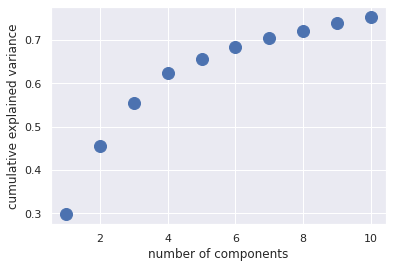

In [ ]:
n = 10
pca = PCA(n_components=n)
pca.fit(imp_vol)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,svd_solver='auto', tol=0.0, whiten=False)
plt.plot(range(1,n+1), np.cumsum(pca.explained_variance_ratio_), "bo", markersize=12)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('variance_explained.pdf')
plt.show()

In [ ]:
compressed_imp_vol = pca.transform(imp_vol)
compressed_imp_vol

array([[-4.57233594,  0.61022447, -0.34845111, ..., -0.31718123,
        -0.24992709, -0.23747694],
       [-4.48118731,  0.6559528 , -0.38700237, ..., -0.3373147 ,
        -0.16661763, -0.25408068],
       [-4.27798471,  0.71978981, -0.40976821, ..., -0.27356262,
        -0.35122406, -0.26012678],
       ...,
       [-1.82533709,  0.11389123,  0.3285165 , ..., -0.17539742,
        -0.16146327, -0.13176236],
       [-1.85282307,  0.10844398,  0.58241782, ..., -0.29029248,
        -0.16479437,  0.00811415],
       [-1.81774525,  0.02817601,  0.54107141, ..., -0.26405055,
        -0.11762234, -0.0258088 ]])

In [ ]:
first_PC = pd.DataFrame(compressed_imp_vol)[0]
second_PC = pd.DataFrame(compressed_imp_vol)[1]
third_PC = pd.DataFrame(compressed_imp_vol)[2]
fourth_PC = pd.DataFrame(compressed_imp_vol)[3]
fifth_PC = pd.DataFrame(compressed_imp_vol)[4]
sixth_PC = pd.DataFrame(compressed_imp_vol)[5]

PC_all = [first_PC, second_PC, third_PC, fourth_PC, fifth_PC, sixth_PC]

## S&P 500 & VIX Data Obtain

In [ ]:
#Obtain the S&P 500 index and VIX index

start = datetime.datetime(2019, 12, 31)
end = datetime.datetime(2020, 12, 31)

SP500 = web.DataReader(['sp500'], 'fred', start, end).dropna()
vix = web.DataReader(['VIXCLS'], 'fred', start, end).dropna()

In [ ]:
all = pd.merge(vix, SP500, how='left', on=['DATE'])

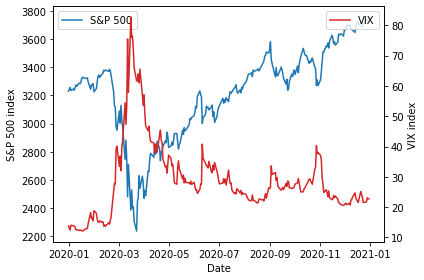

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
color = 'tab:blue'
ax1.set_ylabel('S&P 500 index')  # we already handled the x-label with ax1
ax1.plot(all.index, all['sp500'], color=color, label='S&P 500')
ax1.tick_params(axis='y')
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('VIX index')
ax2.plot(all.index, all['VIXCLS'], color=color, label='VIX')
ax2.tick_params(axis='y')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.show()

In [ ]:
np.corrcoef(SP500['sp500'], vix['VIXCLS'])

array([[ 1.        , -0.77652991],
       [-0.77652991,  1.        ]])

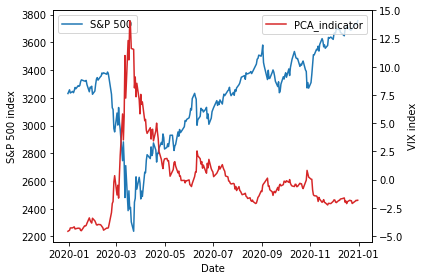

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')

color = 'tab:blue'
ax1.set_ylabel('S&P 500 index')  # we already handled the x-label with ax1
ax1.plot(all.index, all['sp500'], color=color, label='S&P 500')
ax1.tick_params(axis='y')
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('VIX index')
ax2.plot(all.index, first_PC, color=color, label='PCA_indicator')
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.show()

In [ ]:
np.corrcoef(SP500['sp500'], first_PC)

array([[ 1.        , -0.80335443],
       [-0.80335443,  1.        ]])

# Test PCA performance

In [ ]:
#Load the raw data
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Msc_thesis/Data_all.csv').dropna().reset_index()
Data['date'] = Data.date.astype("datetime64")

## Define functions for test process

In [ ]:
def Load_raw_data(start_year, end_year, delta_list=[50], marturity_list=[30]):
  '''
  Load the raw option data of that year, where the default marturity time is [30], and default delta is [50]
  '''
  start = datetime.datetime(start_year, 1, 1)
  end = datetime.datetime(end_year-1, 12, 31)

  #Choose the option with delat equals to 50, which means at-the-money
  Data_temp = Data.copy()
  Data_temp = Data_temp[(Data_temp['date'] >= start) & (Data_temp['date'] <= end)]

  #Select the row which contains the delta in the delta_list
  Data_temp = Data_temp[Data_temp['delta'].apply(lambda x: x in delta_list)]

  #Select the row which contains the marturity in the marturity_list
  Data_temp = Data_temp[Data_temp['days'].apply(lambda x: x in marturity_list)]

  # clean the ticker which lack of some data

  pivot_data = Data_temp.pivot(index = ['days','delta','ticker'] ,
                               columns = 'date',
                               values = 'impl_volatility')
  
  sp500 = pivot_data.dropna().transpose()


  # sp500 = pd.DataFrame(Data_temp.groupby(['ticker', 'date']).impl_volatility.mean().unstack(level=0)).dropna(axis = 1)
  return sp500

In [ ]:
def PCA_first_PC(year_data, dim=10):
  '''
  Input the volatility data of 500 index implied volatility for a specific year, output the first pricinple component of it after PCA
  '''
  #preprocessing
  imp_vol = year_data.copy()
  # for n in list(year_data):
  #     #imp_vol[n] = imp_vol[n].diff()
  #     #print n, np.mean(imp_vol[n]), np.std(imp_vol[n])
  #     imp_vol[n] = (imp_vol[n] - np.mean(imp_vol[n])) #/np.std(imp_vol[n])
  imp_vol = imp_vol.dropna()

  imp_vol_train, imp_vol_test = train_test_split(imp_vol, test_size=0.25, shuffle=False)

  # imp_vol_train = imp_vol
  # imp_vol_test = imp_vol
  #PCA
  pca = PCA(n_components = dim)
  pca.fit(imp_vol_train)
  # PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,svd_solver='auto', tol=0.0, whiten=False)
  # plt.plot(range(1,n+1), np.cumsum(pca.explained_variance_ratio_), "bo", markersize=12)
  # plt.xlabel('number of components')
  # plt.ylabel('cumulative explained variance')
  # plt.show()

  compressed_imp_vol = pca.transform(imp_vol_test)
  
  PC_all = pd.DataFrame(data = compressed_imp_vol, index = imp_vol_test.index)

  # first_PC = 
  # second_PC = pd.DataFrame(compressed_imp_vol)[1]
  # third_PC = pd.DataFrame(compressed_imp_vol)[2]
  # fourth_PC = pd.DataFrame(compressed_imp_vol)[3]
  # fifth_PC = pd.DataFrame(compressed_imp_vol)[4]
  # sixth_PC = pd.DataFrame(compressed_imp_vol)[5]

  PC_all = PC_all.rename(columns={0: "first_PC", 1: "second_PC", 2: "third_PC", 3: "fourth_PC", 4: "fifth_PC", 5: "sixth_PC", 6: "seventh_PC"})#, 7: "eighth_PC", 8: "ninth_PC", 9: "tenth_PC"})
  return PC_all


In [ ]:
def get_SP_VIX(start_year, end_year):
  '''
  Input a year(int), then output the corresponding VIX and S&P500 index in that year.
  '''
  #Obtain the S&P 500 index and VIX index

  start = datetime.datetime(start_year, 1, 1)
  end = datetime.datetime(end_year-1, 12, 31)
  # diff_start = datetime.datetime(year-1, 12, 25)
  # diff_end = datetime.datetime(year+1, 12, 31)

  SP500 = web.DataReader(['sp500'], 'fred', start, end).dropna()
  vix = web.DataReader(['VIXCLS'], 'fred', start, end).dropna()


  # SP500_return_1 = SP500_return.diff(-1) / SP500_return
  # SP500_return_1 = SP500_return_1[SP500_return_1.index <= end].dropna()

  # SP500_return_1_abs = abs(SP500_return.diff(-1) / SP500_return)
  # SP500_return_1_abs = SP500_return_1_abs[SP500_return_1_abs.index <= end].dropna()

  # SP500_return_30 = SP500_return.diff(-30) / SP500_return
  # SP500_return_30 = SP500_return_30[SP500_return_30.index <= end].dropna()

  # SP500_return_30_abs = abs(SP500_return.diff(-30) / SP500_return)
  # SP500_return_30_abs = SP500_return_30_abs[SP500_return_30_abs.index <= end].dropna()

  return SP500, vix #,SP500_return_1, SP500_return_1_abs, SP500_return_30, SP500_return_30_abs

In [ ]:
def get_sp_vol(start_year, end_year, days=21):
  '''
  input a year, output the corresponding next n=21 days S&P 500 realized volatility computed via close price
  30 calendar days = 21 work days
  '''

  n = days

  start = datetime.datetime(start_year, 1, 1)
  end = datetime.datetime(end_year-1, 12, 31)
  diff_start = datetime.datetime(start_year-1, 12, 25)
  diff_end = datetime.datetime(end_year, 12, 31)

   # this is a longer version of data for the computation of realized volatility
  SP500_diff = web.DataReader(['sp500'], 'fred', diff_start, diff_end).dropna()

  # daily return
  SP500_return = np.log(SP500_diff).diff(1)
  SP500_return = SP500_return[(SP500_return.index <= diff_end) & (SP500_return.index >= start)].dropna()

  # compute the next n=21 days variance of s&p return, and compute a mean in n=1 days（指数平滑处理）
  SP500_std = SP500_return[::-1].rolling(window=n).std().rolling(window=1).mean()[::-1]

  # covert the daily volatility to year-volatility
  SP500_std = SP500_std[(SP500_std.index <= end) & (SP500_std.index >= start)].dropna()
  SP500_std = SP500_std * np.sqrt(252)

  return SP500_std


In [ ]:
def coef_test1(start_year, end_year, delta=[50], marturity=[30], PC_i=1, vol_next_days=21):
  SP500, vix = get_SP_VIX(start_year, end_year)
  sp500_std = get_sp_vol(start_year, end_year, vol_next_days) * 100

  data = Load_raw_data(start_year, end_year, delta, marturity)
  PC_choice = PCA_first_PC(data).iloc[:, PC_i-1]

  # Check the lag effect
  #vix = vix.shift(-15)
  # PC_choice = PC_choice.shift(-12)
  all = sp500_std.join(vix).join(PC_choice).dropna()

  print(all.corr())

  all = all.rename(columns={"sp500": "S&P 500 Realized Volatility", "VIXCLS": "VIX"})

  all.plot()

In [ ]:
def coef_test2(start_year, end_year, delta=[50], marturity=[30], PC_i=1):
  '''
  Year can be chosen from [2012-2020]
  Delta can be chosen from [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
  Marturity can be chosen from 30, 60. More choices of marturity will make the whole dataset too large, so we only consider two most traded marturity
  PC_i means the i-th principle component, which can be selected from 1-10 (depends on the PCA model)
  '''
  data_one_year = Load_raw_data(start_year, end_year, delta, marturity)
  PC_choice = PCA_first_PC(data_one_year).iloc[:, PC_i-1]

  SP500, vix = get_SP_VIX(start_year, end_year)
  #SP500, VIX, SP500_return_1, SP500_return_1_abs, SP500_return_30, SP500_return_30_abs = get_SP_VIX(year)
  all = SP500.join(vix).join(PC_choice).dropna()

  #print(all.corr())
  print('coef of SP500 and VIX between', start_year, 'and', end_year, 'is', all.corr().iat[0,1])
  print('coef of SP500 and PCA_indicator between' , start_year, 'and', end_year, 'is', all.corr().iat[0,2])

  return all.corr().iat[0,1], all.corr().iat[0,2]
  # print(np.corrcoef(SP500_return_1['sp500'], VIX['VIXCLS'])[0,1])
  # print(np.corrcoef(SP500_return_1['sp500'], first_PC)[0,1])

  # print(np.corrcoef(SP500_return_1_abs['sp500'], VIX['VIXCLS'])[0,1])
  # print(np.corrcoef(SP500_return_1_abs['sp500'], first_PC)[0,1])

  # print(np.corrcoef(SP500_return_30['sp500'], VIX['VIXCLS'])[0,1])
  # print(np.corrcoef(SP500_return_30['sp500'], first_PC)[0,1])

  # print(np.corrcoef(SP500_return_30_abs['sp500'], VIX['VIXCLS'])[0,1])
  # print(np.corrcoef(SP500_return_30_abs['sp500'], first_PC)[0,1])

## PCA Test Result for different year and other different settings

### Plot the VIX and S&P volatility

In [ ]:
def vix_sp_plot(start_year, end_year, vol_next_days=21):
  SP500, vix = get_SP_VIX(start_year, end_year)
  vix = vix.rolling(window=15).mean() / 100

  sp500_std = get_sp_vol(start_year, end_year, vol_next_days).rolling(window=15).mean()
 
  all = sp500_std.join(vix).dropna()

  print(all.corr())

  all = all.rename(columns={"sp500": "Realized Volatility of S&P 500 index", "VIXCLS": "Expected Volatility calculated by VIX"})

  all.plot()
  plt.savefig('1.pdf', bbox_inches='tight')

          sp500   VIXCLS
sp500   1.00000  0.66459
VIXCLS  0.66459  1.00000


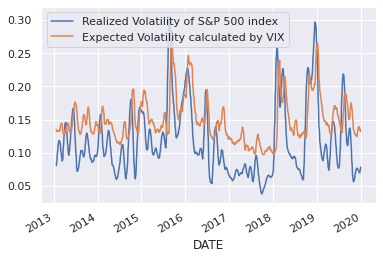

In [ ]:
vix_sp_plot(2013,2020, 21)


### Correlatio of realized volatility and predicted volatility by PCA and VIX

             sp500    VIXCLS  first_PC
sp500     1.000000  0.693880  0.467704
VIXCLS    0.693880  1.000000  0.717649
first_PC  0.467704  0.717649  1.000000


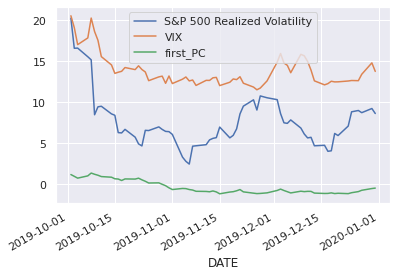

In [ ]:
class parameters:
  '''
  start_year can be chosen from [2012-2019]
  end_year can be chosen from [2013-2020]
  The test period is 01/01/start_year to 12/31/end_year-1

  Delta can be chosen from [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
  Marturity can be chosen from 30, 60. More choices of marturity will make the whole dataset too large, so we only consider two most traded marturity
  PC_i means the i-th principle component, which can be selected from 1-10 (depends on the PCA model)
  '''
  start_year = 2019
  end_year = 2020
  delta = [50]
  marturity = [30]
  PC_i = 1
  #set the days for realized volatility we wanna compute from the close price of @&P 500 index
  next_n_days = 7

coef_test1(parameters.start_year, parameters.end_year,parameters.delta, parameters.marturity, parameters.PC_i, parameters.next_n_days)

### Correlation  of market fear (S&P 500 price) and PCA indicator and VIX indicator

In [ ]:
class parameters:
  '''
  start_year can be chosen from [2012-2020]
  end_year can be chosen from [2013-2021]
  The test period is 01/01/start_year to 12/31/end_year-1

  Delta can be chosen from [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
  Marturity can be chosen from [30, 60]. More choices of marturity will make the whole dataset too large, so we only consider two most traded marturity
  PC_i means the i-th principle component, which can be selected from 1-10 (depends on the PCA model)
  '''
  start_year = 2020
  end_year = 2021
  #delta = [10, 20, 30, 40, 50, 60, 70, 80, 90]
  delta = [50]
  marturity = [30]
  PC_i = 1

coef_test2(parameters.start_year, parameters.end_year,parameters.delta, parameters.marturity, parameters.PC_i)

coef of SP500 and VIX between 2020 and 2021 is -0.8810184955332838
coef of SP500 and PCA_indicator between 2020 and 2021 is -0.9181856114569351


(-0.8810184955332838, -0.9181856114569351)

In [ ]:
coef2_list = []

for i in range(2013, 2021):
  start_year = i
  end_year = i+1

  coef2_list.append(coef_test2(start_year, end_year, delta = [50], PC_i=6))

coef2_list

coef of SP500 and VIX between 2013 and 2014 is -0.7363384525983651
coef of SP500 and PCA_indicator between 2013 and 2014 is -0.2372909579504351
coef of SP500 and VIX between 2014 and 2015 is -0.7412527306482619
coef of SP500 and PCA_indicator between 2014 and 2015 is -0.6644487407135046
coef of SP500 and VIX between 2015 and 2016 is -0.6737806904229403
coef of SP500 and PCA_indicator between 2015 and 2016 is 0.04529638412180205
coef of SP500 and VIX between 2016 and 2017 is -0.776402773562529
coef of SP500 and PCA_indicator between 2016 and 2017 is -0.32349469157715444
coef of SP500 and VIX between 2017 and 2018 is -0.04405712940218735
coef of SP500 and PCA_indicator between 2017 and 2018 is -0.4465031638977876
coef of SP500 and VIX between 2018 and 2019 is -0.9273453423195767
coef of SP500 and PCA_indicator between 2018 and 2019 is -0.7399887891884754
coef of SP500 and VIX between 2019 and 2020 is -0.6496238793298563
coef of SP500 and PCA_indicator between 2019 and 2020 is 0.348159329

[(-0.7363384525983651, -0.2372909579504351),
 (-0.7412527306482619, -0.6644487407135046),
 (-0.6737806904229403, 0.04529638412180205),
 (-0.776402773562529, -0.32349469157715444),
 (-0.04405712940218735, -0.4465031638977876),
 (-0.9273453423195767, -0.7399887891884754),
 (-0.6496238793298563, 0.34815932946312633),
 (-0.8810184955332838, -0.4439125291780541)]

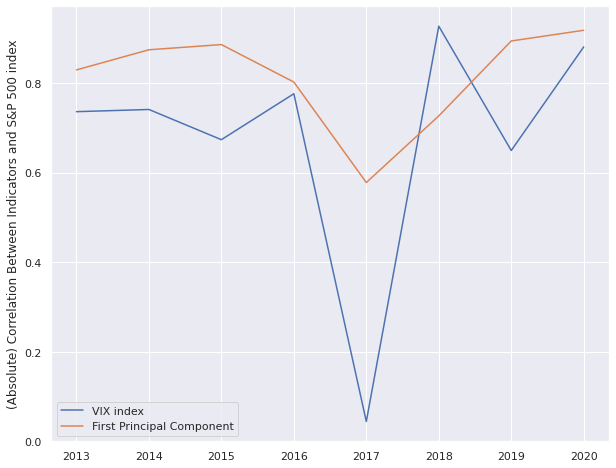

In [ ]:
temp_plt = pd.DataFrame(coef2_list)

year = []
for i in range(2013, 2021):
  year.append(i)

plt.figure(figsize=(10,8))
plt.plot(year, abs(temp_plt[0]), label='VIX index')
plt.plot(year, abs(temp_plt[1]), label='First Principal Component')
plt.ylabel('(Absolute) Correlation Between Indicators and S&P 500 index')
plt.legend()
plt.savefig('VIX_firstPC_compare.pdf')
plt.show()


### Regression Analysis (Based on Different Number of Components)

In [ ]:
from sklearn.linear_model import LinearRegression


def regression_PCA(start_year, end_year, delta=[50], marturity=[30], PC_number = 1):

  data_one_year = Load_raw_data(start_year, end_year, delta, marturity)

  SP500, vix = get_SP_VIX(start_year, end_year)

  all = SP500.join(vix)
  
  for i in range(PC_number):
    PC_choice = PCA_first_PC(data_one_year).iloc[:, i]
    all = all.join(PC_choice).dropna()

  X, y, VIX= all.iloc[:, 2:], all.sp500, all.iloc[:, 1:2]

  model_1 = LinearRegression()
  model_1.fit(X, y)
  yhat = model_1.predict(X)
  SS_Residual = sum((y-yhat)**2)       
  SS_Total = sum((y-np.mean(y))**2)     
  r_squared_PCA = 1 - (float(SS_Residual))/SS_Total

  model_2 = LinearRegression()
  model_2.fit(VIX, y)
  yhat = model_2.predict(VIX)
  SS_Residual = sum((y-yhat)**2)       
  SS_Total = sum((y-np.mean(y))**2)     
  r_squared_VIX = 1 - (float(SS_Residual))/SS_Total

  return r_squared_PCA, r_squared_VIX
  

In [ ]:
def regression_PCA_vol(start_year, end_year, delta=[50], marturity=[30], PC_number = 1, vol_days = 7):

  data_one_year = Load_raw_data(start_year, end_year, delta, marturity)

  SP500, vix = get_SP_VIX(start_year, end_year)

  sp500_std = get_sp_vol(start_year, end_year, vol_days) * 100

  all = sp500_std.join(vix)
  
  for i in range(PC_number):
    PC_choice = PCA_first_PC(data_one_year).iloc[:, i]
    all = all.join(PC_choice).dropna()

  X, y, VIX= all.iloc[:, 2:], all.sp500, all.iloc[:, 1:2]

  model_1 = LinearRegression()
  model_1.fit(X, y)
  yhat = model_1.predict(X)
  SS_Residual = sum((y-yhat)**2)       
  SS_Total = sum((y-np.mean(y))**2)     
  r_squared_PCA = 1 - (float(SS_Residual))/SS_Total

  model_2 = LinearRegression()
  model_2.fit(VIX, y)
  yhat = model_2.predict(VIX)
  SS_Residual = sum((y-yhat)**2)       
  SS_Total = sum((y-np.mean(y))**2)     
  r_squared_VIX = 1 - (float(SS_Residual))/SS_Total

  return r_squared_PCA, r_squared_VIX


In [ ]:
def Plot_PCA_Predict(start_year, end_year, delta=[50], marturity=[30], PC_number = 1, vol = 0):

  data_one_year = Load_raw_data(start_year, end_year, delta, marturity)

  SP500, vix = get_SP_VIX(start_year, end_year)

  if vol:
    sp500_std = get_sp_vol(start_year, end_year, 7) * 100
    all = sp500_std.join(vix)
  else:
    all = SP500.join(vix)
  
  for i in range(PC_number):
    PC_choice = PCA_first_PC(data_one_year).iloc[:, i]
    all = all.join(PC_choice).dropna()

  X, y, VIX= all.iloc[:, 2:], all.sp500, all.iloc[:, 1:2]

  model = LinearRegression()
  model.fit(X, y)
  yhat = model.predict(X)

  model_VIX = LinearRegression()
  model_VIX.fit(VIX, y)
  yhat_VIX = model_VIX.predict(VIX)

  temp = pd.DataFrame(data = yhat, index = all.index).rename(columns={0: "Regression via 6PC model"})
  temp_2 = pd.DataFrame(data = yhat_VIX, index = all.index).rename(columns={0: "Regression via VIX"})

  temp = temp.join(temp_2)
  temp = temp.join(all.iloc[:, 0:1]).rename(columns={'sp500': "S&P 500 index"})

  plot = temp.plot()
  
  fig = plot.get_figure()
  fig.savefig("regression.pdf")

  plot

  # return yhat, yhat_VIX

  #return r_squared_PCA, r_squared_VIX

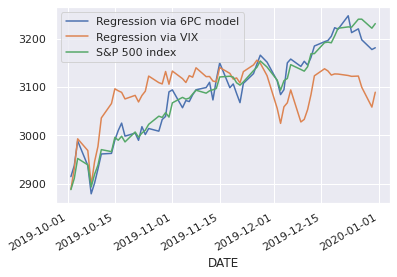

In [ ]:
Plot_PCA_Predict(2019, 2020, PC_number = 6)

#### 2013-2014 regression result

In [ ]:
print(regression_PCA(2013, 2014,PC_number = 1))
print(regression_PCA(2013, 2014,PC_number = 2))
print(regression_PCA(2013, 2014,PC_number = 3))
print(regression_PCA(2013, 2014,PC_number = 4))
print(regression_PCA(2013, 2014,PC_number = 5))
print(regression_PCA(2013, 2014,PC_number = 6))

(0.688312069121343, 0.5421943167749543)
(0.7666968796493204, 0.5421943167749543)
(0.842423967260869, 0.5421943167749543)
(0.8429808634561613, 0.5421943167749543)
(0.8649090076350361, 0.5421943167749543)
(0.8681091749171901, 0.5421943167749543)


In [ ]:
print(regression_PCA_vol(2013, 2014, PC_number = 1))
print(regression_PCA_vol(2013, 2014, PC_number = 2))
print(regression_PCA_vol(2013, 2014, PC_number = 3))
print(regression_PCA_vol(2013, 2014, PC_number = 4))
print(regression_PCA_vol(2013, 2014, PC_number = 5))
print(regression_PCA_vol(2013, 2014, PC_number = 6))

(0.19550195906236367, 0.49960091135000184)
(0.4475847960418927, 0.49960091135000184)
(0.4485058216828166, 0.49960091135000184)
(0.4654297871087153, 0.49960091135000184)
(0.5963104114242243, 0.49960091135000184)
(0.607770072334706, 0.49960091135000184)


#### 2014-2015 regression result

In [ ]:
print(regression_PCA(2014, 2015,PC_number = 1))
print(regression_PCA(2014, 2015,PC_number = 2))
print(regression_PCA(2014, 2015,PC_number = 3))
print(regression_PCA(2014, 2015,PC_number = 4))
print(regression_PCA(2014, 2015,PC_number = 5))
print(regression_PCA(2014, 2015,PC_number = 6))

(0.7649931822232241, 0.5494556106935038)
(0.7683631934406201, 0.5494556106935038)
(0.8131005432673257, 0.5494556106935038)
(0.8700613570500377, 0.5494556106935038)
(0.8920990996755999, 0.5494556106935038)
(0.8929414833458088, 0.5494556106935038)


In [ ]:
print(regression_PCA_vol(2014, 2015,PC_number = 1))
print(regression_PCA_vol(2014, 2015,PC_number = 2))
print(regression_PCA_vol(2014, 2015,PC_number = 3))
print(regression_PCA_vol(2014, 2015,PC_number = 4))
print(regression_PCA_vol(2014, 2015,PC_number = 5))
print(regression_PCA_vol(2014, 2015,PC_number = 6))

(0.3188868344854301, 0.3347557608621804)
(0.3189081026937628, 0.3347557608621804)
(0.5239459673448024, 0.3347557608621804)
(0.5556885687236441, 0.3347557608621804)
(0.5588300545521694, 0.3347557608621804)
(0.577377832563333, 0.3347557608621804)


#### 2015-2016 regression result

In [ ]:
print(regression_PCA(2015, 2016, PC_number = 1))
print(regression_PCA(2015, 2016, PC_number = 2))
print(regression_PCA(2015, 2016, PC_number = 3))
print(regression_PCA(2015, 2016, PC_number = 4))
print(regression_PCA(2015, 2016, PC_number = 5))
print(regression_PCA(2015, 2016, PC_number = 6))

(0.7854652361092412, 0.45398041878681505)
(0.7860374527615426, 0.45398041878681505)
(0.8041776692598237, 0.45398041878681505)
(0.8467642730937273, 0.45398041878681505)
(0.8654475365326262, 0.45398041878681505)
(0.8728658985615838, 0.45398041878681505)


In [ ]:
print(regression_PCA_vol(2015, 2016, PC_number = 1))
print(regression_PCA_vol(2015, 2016, PC_number = 2))
print(regression_PCA_vol(2015, 2016, PC_number = 3))
print(regression_PCA_vol(2015, 2016, PC_number = 4))
print(regression_PCA_vol(2015, 2016, PC_number = 5))
print(regression_PCA_vol(2015, 2016, PC_number = 6))

(4.9037175643529274e-05, 0.13587008075723506)
(0.25715689069454495, 0.13587008075723506)
(0.33331952164791856, 0.13587008075723506)
(0.34070423566441554, 0.13587008075723506)
(0.3407150365094991, 0.13587008075723506)
(0.3440312207193511, 0.13587008075723506)


#### 2016-2017 Regression Result

In [ ]:
print(regression_PCA(2016, 2017, PC_number = 1))
print(regression_PCA(2016, 2017, PC_number = 2))
print(regression_PCA(2016, 2017, PC_number = 3))
print(regression_PCA(2016, 2017, PC_number = 4))
print(regression_PCA(2016, 2017, PC_number = 5))
print(regression_PCA(2016, 2017, PC_number = 6))

(0.6440826543464953, 0.602801266795587)
(0.7723547428475486, 0.602801266795587)
(0.9000779836990767, 0.602801266795587)
(0.9176241743892606, 0.602801266795587)
(0.9284937216083962, 0.602801266795587)
(0.9290823992996129, 0.602801266795587)


In [ ]:
print(regression_PCA_vol(2016, 2017, PC_number = 1))
print(regression_PCA_vol(2016, 2017, PC_number = 2))
print(regression_PCA_vol(2016, 2017, PC_number = 3))
print(regression_PCA_vol(2016, 2017, PC_number = 4))
print(regression_PCA_vol(2016, 2017, PC_number = 5))
print(regression_PCA_vol(2016, 2017, PC_number = 6))

(0.009304023428511332, 0.2724706599711644)
(0.1615021380942242, 0.2724706599711644)
(0.16151128234920153, 0.2724706599711644)
(0.18499822865782378, 0.2724706599711644)
(0.2321564805052876, 0.2724706599711644)
(0.23493697515033185, 0.2724706599711644)


#### 2017-2018 Regression Result

In [ ]:
print(regression_PCA(2017, 2018, PC_number = 1))
print(regression_PCA(2017, 2018, PC_number = 2))
print(regression_PCA(2017, 2018, PC_number = 3))
print(regression_PCA(2017, 2018, PC_number = 4))
print(regression_PCA(2017, 2018, PC_number = 5))
print(regression_PCA(2017, 2018, PC_number = 6))

(0.3341176964213335, 0.0019410306511605802)
(0.5148820850328877, 0.0019410306511605802)
(0.7288250903451045, 0.0019410306511605802)
(0.7288735792249229, 0.0019410306511605802)
(0.7301109111951096, 0.0019410306511605802)
(0.7358588153774668, 0.0019410306511605802)


In [ ]:
print(regression_PCA_vol(2017, 2018, PC_number = 1))
print(regression_PCA_vol(2017, 2018, PC_number = 2))
print(regression_PCA_vol(2017, 2018, PC_number = 3))
print(regression_PCA_vol(2017, 2018, PC_number = 4))
print(regression_PCA_vol(2017, 2018, PC_number = 5))
print(regression_PCA_vol(2017, 2018, PC_number = 6))

(0.2139447303228621, 0.09023497124370916)
(0.2142600363712075, 0.09023497124370916)
(0.24321913101112536, 0.09023497124370916)
(0.2572331399849278, 0.09023497124370916)
(0.25990099953192003, 0.09023497124370916)
(0.27373334404510763, 0.09023497124370916)


#### 2018-2019 Regression Result

In [ ]:
print(regression_PCA(2018, 2019, PC_number = 1))
print(regression_PCA(2018, 2019, PC_number = 2))
print(regression_PCA(2018, 2019, PC_number = 3))
print(regression_PCA(2018, 2019, PC_number = 4))
print(regression_PCA(2018, 2019, PC_number = 5))
print(regression_PCA(2018, 2019, PC_number = 6))

(0.5283478976214151, 0.8599693839218123)
(0.5886314614510852, 0.8599693839218123)
(0.6330684004394491, 0.8599693839218123)
(0.7786174903131806, 0.8599693839218123)
(0.8228409604000773, 0.8599693839218123)
(0.9254413149724068, 0.8599693839218123)


In [ ]:
print(regression_PCA_vol(2018, 2019, PC_number = 1))
print(regression_PCA_vol(2018, 2019, PC_number = 2))
print(regression_PCA_vol(2018, 2019, PC_number = 3))
print(regression_PCA_vol(2018, 2019, PC_number = 4))
print(regression_PCA_vol(2018, 2019, PC_number = 5))
print(regression_PCA_vol(2018, 2019, PC_number = 6))

(0.22118006299700343, 0.232298701110921)
(0.2951230018195623, 0.232298701110921)
(0.30392713050036346, 0.232298701110921)
(0.3836747939326517, 0.232298701110921)
(0.38773950790962686, 0.232298701110921)
(0.5017358972275499, 0.232298701110921)


#### 2019-2020 Regression Result

In [ ]:
print(regression_PCA(2019, 2020, PC_number = 1))
print(regression_PCA(2019, 2020, PC_number = 2))
print(regression_PCA(2019, 2020, PC_number = 3))
print(regression_PCA(2019, 2020, PC_number = 4))
print(regression_PCA(2019, 2020, PC_number = 5))
print(regression_PCA(2019, 2020, PC_number = 6))

(0.7997866029058958, 0.42201118459557263)
(0.8603378433013978, 0.42201118459557263)
(0.9402989160623701, 0.42201118459557263)
(0.941730105169032, 0.42201118459557263)
(0.94859335288169, 0.42201118459557263)
(0.9528395018903272, 0.42201118459557263)


In [ ]:
print(regression_PCA_vol(2019, 2020, PC_number = 1))
print(regression_PCA_vol(2019, 2020, PC_number = 2))
print(regression_PCA_vol(2019, 2020, PC_number = 3))
print(regression_PCA_vol(2019, 2020, PC_number = 4))
print(regression_PCA_vol(2019, 2020, PC_number = 5))
print(regression_PCA_vol(2019, 2020, PC_number = 6))

(0.21874719053375746, 0.4814690830683437)
(0.3259140599762679, 0.4814690830683437)
(0.47840823294881407, 0.4814690830683437)
(0.5719435925339833, 0.4814690830683437)
(0.5931733870886333, 0.4814690830683437)
(0.5989467633161494, 0.4814690830683437)


#### 2020-2021 Regression Result

In [ ]:
print(regression_PCA(2020, 2021, PC_number = 1))
print(regression_PCA(2020, 2021, PC_number = 2))
print(regression_PCA(2020, 2021, PC_number = 3))
print(regression_PCA(2020, 2021, PC_number = 4))
print(regression_PCA(2020, 2021, PC_number = 5))
print(regression_PCA(2020, 2021, PC_number = 6))

(0.8430648170865457, 0.77619358947173)
(0.9045825198599822, 0.77619358947173)
(0.9054655758307352, 0.77619358947173)
(0.9139030189838431, 0.77619358947173)
(0.9145512233486572, 0.77619358947173)
(0.9254082721057684, 0.77619358947173)


In [ ]:
print(regression_PCA_vol(2020, 2021, PC_number = 1))
print(regression_PCA_vol(2020, 2021, PC_number = 2))
print(regression_PCA_vol(2020, 2021, PC_number = 3))
print(regression_PCA_vol(2020, 2021, PC_number = 4))
print(regression_PCA_vol(2020, 2021, PC_number = 5))
print(regression_PCA_vol(2020, 2021, PC_number = 6))

(0.48552308599760174, 0.4757861753069732)
(0.48713825752744777, 0.4757861753069732)
(0.4874073701963305, 0.4757861753069732)
(0.48965595172625487, 0.4757861753069732)
(0.5027494020921173, 0.4757861753069732)
(0.5223542995636767, 0.4757861753069732)


# Auto-encoder & Reconstruction Error

## Reconstruction Error

In [ ]:
def mean_abs_error(y_true, y_pred):
  return np.mean(abs(y_true - y_pred), axis=1).mean()

In [ ]:
# Reconstruction Error of PCA
def pca_error(X_train, n=10):
  '''
  Reconstruction Error by a n-componenets PCA with input X_train (where the different stocks are regards as features)
  '''
  pca = PCA(n_components=n)

  X_train, X_test = train_test_split(X_train, test_size=0.25, shuffle= False)

  pca.fit(X_train)

  X_test_pca = pca.transform(X_test)
  X_projected = pca.inverse_transform(X_test_pca)

  #Mean error of (sum of all the features) each day, Mean Absolute Error
  loss = mean_abs_error(X_test, X_projected)

  return loss

In [ ]:
def pca_reconst_error(start_year, end_year, delta=[50], marturity=[30]):
  data_one_year = Load_raw_data(start_year, end_year, delta, marturity)
  for pca_components in range(1,7):
    error = pca_error(data_one_year, pca_components)  
    print('The reconstruction error of', pca_components,'components PCA is', error)

In [ ]:
# Delta = [50]
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [50]
  marturity = [30]
  #PC_i = 1

pca_reconst_error(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

The reconstruction error of 1 components PCA is 0.06264566573566656
The reconstruction error of 2 components PCA is 0.057278030697761974
The reconstruction error of 3 components PCA is 0.05424064943004661
The reconstruction error of 4 components PCA is 0.053874717672809276
The reconstruction error of 5 components PCA is 0.050846523716103154
The reconstruction error of 6 components PCA is 0.04802897626080222


In [ ]:
# Delta = [40, 50, 60]
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [40, 50, 60]
  marturity = [30]
  #PC_i = 1

pca_reconst_error(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

The reconstruction error of 1 components PCA is 0.06363565648776906
The reconstruction error of 2 components PCA is 0.05828431005417192
The reconstruction error of 3 components PCA is 0.05525438273865328
The reconstruction error of 4 components PCA is 0.05482247379001945
The reconstruction error of 5 components PCA is 0.05096571632978377
The reconstruction error of 6 components PCA is 0.04897799807314583


In [ ]:
# Delta = [30, 40, 50, 60, 70]
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [30, 40, 50, 60, 70]
  marturity = [30]
  #PC_i = 1

pca_reconst_error(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

The reconstruction error of 1 components PCA is 0.0657181522971078
The reconstruction error of 2 components PCA is 0.06066279358906787
The reconstruction error of 3 components PCA is 0.05775882760723507
The reconstruction error of 4 components PCA is 0.057125884936417806
The reconstruction error of 5 components PCA is 0.0530096716843026
The reconstruction error of 6 components PCA is 0.05181276266735978


In [ ]:
# Delta = [20, 30, 40, 50, 60, 70, 80]
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [20, 30, 40, 50, 60, 70, 80]
  marturity = [30]
  #PC_i = 1

pca_reconst_error(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

The reconstruction error of 1 components PCA is 0.06991683628675206
The reconstruction error of 2 components PCA is 0.06574085125540066
The reconstruction error of 3 components PCA is 0.06327537605864063
The reconstruction error of 4 components PCA is 0.06234484252951131
The reconstruction error of 5 components PCA is 0.061065587131874814
The reconstruction error of 6 components PCA is 0.05997209731660857


In [ ]:
# Delta = [10, 20, 30, 40, 50, 60, 70, 80, 90]
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [10, 20, 30, 40, 50, 60, 70, 80, 90]
  marturity = [30]
  #PC_i = 1

pca_reconst_error(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

The reconstruction error of 1 components PCA is 0.077568875479487
The reconstruction error of 2 components PCA is 0.07563957309624078
The reconstruction error of 3 components PCA is 0.07484754770204483
The reconstruction error of 4 components PCA is 0.0727070929393943
The reconstruction error of 5 components PCA is 0.07010598284163068
The reconstruction error of 6 components PCA is 0.06777476592738205


## Autoencoder

### Preprocess

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf

from keras import layers
from sklearn.model_selection import train_test_split

# import seaborn as sns
# plt.style.use('ggplot')

layers = keras.layers
K = keras.backend

tf.compat.v1.disable_eager_execution()

In [ ]:
def reconstruction_loss(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [ ]:
def reset_seed(seed):
    """
    Set the seed for all random generators to get repeatable model training
    """
    tf.compat.v1.reset_default_graph()
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.compat.v1.set_random_seed(seed)
    tf.compat.v2.random.set_seed(seed)

In [ ]:
def build_autoencoder(encoding_dim, input_size, seed=None):
    reset_seed(seed)
    
    # Encoder
    x = layers.Input(shape=(input_size,))
    h1 = layers.Dense(64, activation='relu')(x)
    h2 = layers.Dense(32, activation='relu')(h1)
    encoded = layers.Dense(encoding_dim, activation='relu')(h2)

    #Decoder
    decoder = keras.Sequential([
            layers.Dense(64, input_dim=encoding_dim, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(input_size, activation='sigmoid')
        ])
    
    decoded = decoder(encoded)
    
    # h3 = layers.Dense(32, activation='relu')(encoded)
    # h4 = layers.Dense(32, activation='relu')(h3)
    # decoded = layers.Dense(input_size, activation='sigmoid')(h4)


    encoder = keras.Model(x, encoded)

    autoencoder = keras.Model(x, decoded)
    autoencoder.compile(optimizer='adam', loss=reconstruction_loss)
    
    return autoencoder, encoder, decoder

In [ ]:
def train_autoencoder(encoding_dim, X_train, X_valid, seed):
    input_size = X_train.shape[1]
    autoencoder, encoder, decoder = build_autoencoder(encoding_dim, input_size, seed=seed) 

    train = autoencoder.fit(X_train,
                    X_train,
                    shuffle=True,
                    epochs=50,
                    batch_size= 10,
                    validation_data=(X_valid, X_valid),
                    verbose = 0
                    )

    return encoder, decoder, train

### Testing

#### Example Case

In [ ]:
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [30,40,50,60,70]
  marturity = [30]
  seed = 256
  encoding_dim = 1
  #test_year = 2020

#data_all = Load_raw_data(parameters.start_year, parameters.end_year)
#X_norm = (X - X.mean()) / (X.max() - X.min())

#test_date = datetime.datetime(parameters.test_year, 1, 1)

# test_data = data_all[data_all.index >= test_date]
# train_data = data_all[data_all.index <= test_date]

#X_train, X_test = train_test_split(data_autoencoder)

train_data = Load_raw_data(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

X_train, X_test = train_test_split(train_data, test_size=0.25, shuffle= False)

X_train, X_valid = train_test_split(X_train, test_size=0.25, shuffle= True)

In [ ]:
encoder, decoder, train = train_autoencoder(1, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

In [ ]:
plt.plot(train.history["loss"], label="Training")
plt.plot(train.history["val_loss"], "b-.", label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
#plt.title("With dropout", loc='center', fontsize=13)
plt.ylim(0,0.1)
plt.gcf().set_facecolor("white")
plt.show()

#### Test Delta in [50]

In [ ]:
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [50]
  marturity = [30]
  seed = 256
  encoding_dim = 1
  #test_year = 2020

#data_all = Load_raw_data(parameters.start_year, parameters.end_year)
#X_norm = (X - X.mean()) / (X.max() - X.min())

#test_date = datetime.datetime(parameters.test_year, 1, 1)

# test_data = data_all[data_all.index >= test_date]
# train_data = data_all[data_all.index <= test_date]

#X_train, X_test = train_test_split(data_autoencoder)

train_data = Load_raw_data(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

X_train, X_test = train_test_split(train_data, test_size=0.25, shuffle= False)

X_train, X_valid = train_test_split(X_train, test_size=0.25, shuffle= True)

In [ ]:
# Lantent Dimension = 1
encoder, decoder, train = train_autoencoder(1, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.0697797539504287

In [ ]:
# Lantent Dimension = 2
encoder, decoder, train = train_autoencoder(2, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.06494000649447403

In [ ]:
# Lantent Dimension = 3
encoder, decoder, train = train_autoencoder(3, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.06135581481790774

In [ ]:
# Lantent Dimension = 4
encoder, decoder, train = train_autoencoder(4, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.058737962992735385

In [ ]:
# Lantent Dimension = 5
encoder, decoder, train = train_autoencoder(5, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.05992020885545704

In [ ]:
# Lantent Dimension = 6
encoder, decoder, train = train_autoencoder(6, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.05819437382759935

#### Test Delta in [40, 50, 60]

In [ ]:
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [40, 50, 60]
  marturity = [30]
  seed = 256
  encoding_dim = 1
  #test_year = 2020

#data_all = Load_raw_data(parameters.start_year, parameters.end_year)
#X_norm = (X - X.mean()) / (X.max() - X.min())

#test_date = datetime.datetime(parameters.test_year, 1, 1)

# test_data = data_all[data_all.index >= test_date]
# train_data = data_all[data_all.index <= test_date]

#X_train, X_test = train_test_split(data_autoencoder)

train_data = Load_raw_data(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

X_train, X_test = train_test_split(train_data, test_size=0.25, shuffle= False)

X_train, X_valid = train_test_split(X_train, test_size=0.25, shuffle= True)

In [ ]:
# Lantent Dimension = 1
encoder, decoder, train = train_autoencoder(1, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.10544146426107738

In [ ]:
# Lantent Dimension = 2
encoder, decoder, train = train_autoencoder(2, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.07811223899143953

In [ ]:
# Lantent Dimension = 3
encoder, decoder, train = train_autoencoder(3, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.07104310872228883

In [ ]:
# Lantent Dimension = 4
encoder, decoder, train = train_autoencoder(4, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.06760080009823356

In [ ]:
# Lantent Dimension = 5
encoder, decoder, train = train_autoencoder(5, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.0676636655002597

In [ ]:
# Lantent Dimension = 6
encoder, decoder, train = train_autoencoder(6, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.06278398968491877

#### Test Delta in [30, 40, 50, 60, 70]

In [ ]:
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [30, 40, 50, 60, 70]
  marturity = [30]
  seed = 256
  encoding_dim = 1
  #test_year = 2020

#data_all = Load_raw_data(parameters.start_year, parameters.end_year)
#X_norm = (X - X.mean()) / (X.max() - X.min())

#test_date = datetime.datetime(parameters.test_year, 1, 1)

# test_data = data_all[data_all.index >= test_date]
# train_data = data_all[data_all.index <= test_date]

#X_train, X_test = train_test_split(data_autoencoder)

train_data = Load_raw_data(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

X_train, X_test = train_test_split(train_data, test_size=0.25, shuffle= False)

X_train, X_valid = train_test_split(X_train, test_size=0.25, shuffle= True)

In [ ]:
# Lantent Dimension = 1
encoder, decoder, train = train_autoencoder(1, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.10749881835610699

In [ ]:
# Lantent Dimension = 2
encoder, decoder, train = train_autoencoder(2, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.10749881835610699

In [ ]:
# Lantent Dimension = 3
encoder, decoder, train = train_autoencoder(3, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.08720028807509153

In [ ]:
# Lantent Dimension = 4
encoder, decoder, train = train_autoencoder(4, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.07713764529099697

In [ ]:
# Lantent Dimension = 5
encoder, decoder, train = train_autoencoder(5, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.08009239599448115

In [ ]:
# Lantent Dimension = 6
encoder, decoder, train = train_autoencoder(6, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.06543517291228179

#### Test Delta in [20, 30, 40, 50, 60, 70, 80]

In [ ]:
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [20, 30, 40, 50, 60, 70, 80]
  marturity = [30]
  seed = 256
  encoding_dim = 1
  #test_year = 2020

#data_all = Load_raw_data(parameters.start_year, parameters.end_year)
#X_norm = (X - X.mean()) / (X.max() - X.min())

#test_date = datetime.datetime(parameters.test_year, 1, 1)

# test_data = data_all[data_all.index >= test_date]
# train_data = data_all[data_all.index <= test_date]

#X_train, X_test = train_test_split(data_autoencoder)

train_data = Load_raw_data(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

X_train, X_test = train_test_split(train_data, test_size=0.25, shuffle= False)

X_train, X_valid = train_test_split(X_train, test_size=0.25, shuffle= True)

In [ ]:
# Lantent Dimension = 1
encoder, decoder, train = train_autoencoder(1, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.11126624002713774

In [ ]:
# Lantent Dimension = 2
encoder, decoder, train = train_autoencoder(2, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.08927811398348362

In [ ]:
# Lantent Dimension = 3
encoder, decoder, train = train_autoencoder(3, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.0868073679188961

In [ ]:
# Lantent Dimension = 4
encoder, decoder, train = train_autoencoder(4, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.09469605866545182

In [ ]:
# Lantent Dimension = 5
encoder, decoder, train = train_autoencoder(5, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.09001333172419738

In [ ]:
# Lantent Dimension = 6
encoder, decoder, train = train_autoencoder(6, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.08184097480864634

#### Test Delta in [10, 20, 30, 40, 50, 60 70, 80, 90]

In [ ]:
class parameters:
  start_year = 2012
  end_year = 2021
  delta = [10, 20, 30, 40, 50, 60, 70, 80, 90]
  marturity = [30]
  seed = 256
  encoding_dim = 1
  #test_year = 2020

#data_all = Load_raw_data(parameters.start_year, parameters.end_year)
#X_norm = (X - X.mean()) / (X.max() - X.min())

#test_date = datetime.datetime(parameters.test_year, 1, 1)

# test_data = data_all[data_all.index >= test_date]
# train_data = data_all[data_all.index <= test_date]

#X_train, X_test = train_test_split(data_autoencoder)

train_data = Load_raw_data(parameters.start_year, parameters.end_year, parameters.delta, parameters.marturity)

X_train, X_test = train_test_split(train_data, test_size=0.25, shuffle= False)

X_train, X_valid = train_test_split(X_train, test_size=0.25, shuffle= True)

In [ ]:
# Lantent Dimension = 1
encoder, decoder, train = train_autoencoder(1, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.11688929607415088

In [ ]:
# Lantent Dimension = 2
encoder, decoder, train = train_autoencoder(2, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.1180707355132911

In [ ]:
# Lantent Dimension = 3
encoder, decoder, train = train_autoencoder(3, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.11140780007185694

In [ ]:
# Lantent Dimension = 4
encoder, decoder, train = train_autoencoder(4, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.10104614600098231

In [ ]:
# Lantent Dimension = 5
encoder, decoder, train = train_autoencoder(5, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.0975588104021477

In [ ]:
# Lantent Dimension = 6
encoder, decoder, train = train_autoencoder(6, X_train, X_valid, parameters.seed)

encoder_output = encoder.predict(X_test)
decoder_output = decoder.predict(encoder_output)

mean_abs_error(X_test, decoder_output)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.08951687806505364